## Students Exam Scores

### Summary

This project covers data cleaning and analysis of the 
<a href="https://www.kaggle.com/datasets/desalegngeb/students-exam-scores">Students Exam Scores</a> dataset
from <a href='https://www.kaggle.com/'>Kaggle</a>.

It includes **data preprocessing** and **computation**, **visualization** and **analysis** of the factors that influence 
students test scores.

It uses Python, Numpy and Pandas libraries for data manipulation, Matplotlib and Seaborn for visualizations.

### Dataset Description

The **Students Exam Scores** dataset includes scores from three exams of students at a (fictional) public school and a variety of 
personal and socio-economic factors that may have interaction effects upon them. The dataset contains **30641 observations and
14 attributes**.

**Atribute information:**

- **Gender**: Gender of the student (male/female)
- **EthnicGroup**: Ethnic group of the student (group A to E)
- **ParentEduc**: Parent(s) education background (from some_highschool to master's degree)
- **LunchType**: School lunch type (standard or free/reduced)
- **TestPrep**: Test preparation course followed (completed or none)
- **ParentMaritalStatus**: Parent(s) marital status (married/single/widowed/divorced)
- **PracticeSport**: How often the student parctice sport (never/sometimes/regularly))
- **IsFirstChild**: If the child is first child in the family or not (yes/no)
- **NrSiblings**: Number of siblings the student has (0 to 7)
- **TransportMeans**: Means of transport to school (schoolbus/private)
- **WklyStudyHours**: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
- **MathScore**: math test score(0-100)
- **ReadingScore**: reading test score(0-100)
- **WritingScore**: writing test score(0-100)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy import stats

### Load data

In [2]:
# Retrieve data in a pandas dataframe 
students = pd.read_csv("Students Scores.csv")

# Print the shape and the first rows
print("Dataset shape: ", students.shape)
students.head()

Dataset shape:  (30641, 15)


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Drop first column "Unnamed: 0"

In [3]:
# Drop column "Unnamed: 0"
students = students.drop("Unnamed: 0", axis=1)

### Get columns info

In [4]:
# Get info about datatypes
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


The dataset has four numeric and ten categorical attributes. **Most of the columns have missing values**.

###  Descriptive statistics

In [5]:
# Display descriptive statistics
students.describe().style.format("{:.2f}")

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.00,30641.00,30641.00,30641.00
mean,2.15,66.56,69.38,68.42
std,1.46,15.36,14.76,15.44
min,0.00,0.00,10.00,4.00
25%,1.00,56.00,59.00,58.00
50%,2.00,67.00,70.00,69.00
75%,3.00,78.00,80.00,79.00
max,7.00,100.00,100.00,100.00


We observe that the average number of siblings is 2.

The **mean score** for math, reading and writing is **between 67-69**. The scores have almost the same standard deviation 
which indicates **similar variability**.

Some students scored very low on tests with a **minimum of 0 for math**, **10 for reading** and **4 for writing**. Other students 
scored very high as indicated by the **maximum values of 100** for all the tests.

From all the students, **25% scored below 56-59** and **25% scored above 78-80**. The median value (50th percentile) shows that 
**50%** of the students **scored** below the level of **67-70**.

## Data Cleaning and Preprocessing

### Check for duplicates

In [6]:
# Get the sum of duplicates
students.duplicated().sum()

0

There are **no duplicated values** in the dataset.

### Handle missing values

In [7]:
# Check missing values in all columns
students.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

There are **missing values** in several **categorical columns** and in the **"NrSiblings" numerical column**.

### Impute missing values with median in numerical column 'NrSiblings'

The numerical column 'NrSiblings' contains the number of siblings in the family and has 1572 missing values. 

We'll replace NaN's with the median value, then cast the column from "float" to integer type.

In [8]:
# Create a mask to filter NaN values
HasNan = np.isnan(students.loc[:, 'NrSiblings'])

# Fill NaN's with median of the column
students.loc[HasNan, 'NrSiblings'] = \
          np.nanmedian(students.loc[:, 'NrSiblings'])

# Check again for missing values
students['NrSiblings'].isnull().sum()

0

In [9]:
# Cast the column from object to integer type
students.loc[:, 'NrSiblings'] = \
     students.loc[:, 'NrSiblings'].astype(int)

# Verify the dtype
students.loc[:, 'NrSiblings'].dtype

dtype('int32')

### Impute missing values with mode in categorical columns 

In [10]:
# Fill missing values with the 
# most frequent value
students = students.apply(
           lambda x: x.fillna(
           x.value_counts().index[0]))

In [11]:
# Check if there ar any missing values in all columns
students.isnull().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

### Drop columns 'LunchType' and 'TransportMeans'

Drop the columns 'LunchType' and 'TransportMeans' because it will not provide useful insights for us.

In [12]:
# Drop the columns 'LunchType' and 'TransportMeans'
students.drop(columns=['LunchType', 'TransportMeans'], 
              inplace=True)

### Map categories in columns

In [13]:
# Map categories for column 'TestPrep'
students['TestPrep'] = students['TestPrep'].\
        map({'none':'no', 'completed':'yes'})   

### Add two new columns: Scores and Grades

We'll add two new columns that will be useful for data analysis:
- **Scores** contains the **average of Math, Reading and Writing scores**
<br>

- **Grades** represents students' **grades from A to F** according to Scores

In [14]:
# Add a new column called 'Scores'
students['Scores'] = ((students['MathScore'] + \
                students['ReadingScore'] + \
                students['WritingScore']) / 3).round(2)

# Assuming the following grading scale:
# A: 90-100, B: 80-89, 
# C: 70-79, D: 60-69, F: 0-59

# Define function to assign grades
def assign_grade(score):
    """Assign grades according to score"""
    if 90 <= score <= 100:
        return 'A'
    elif 80 <= score < 90:
        return 'B'
    elif 70 <= score < 80:
        return 'C'
    elif 60 <= score < 70:
        return 'D'
    else:
        return 'F'

# Add a new column called 'Grades' that contains students grades
students['Grades'] = students['Scores'].apply(assign_grade)

students.head(3)

,Gender,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,Scores,Grades
0,female,group C,bachelor's degree,no,married,regularly,yes,3,< 5,71,71,74,72.00,C
1,female,group C,some college,no,married,sometimes,yes,0,5 - 10,69,90,88,82.33,B
2,female,group B,master's degree,no,single,sometimes,yes,4,< 5,87,93,91,90.33,A


## Exploratory Data Analysis

Using data analysis we try to answer the following question: 

### What factors influence students’ test scores?

We'll explore next how each factor influences the overall scores.

### Distribution of Scores

Text(0.5, 1.0, 'Distribution of Scores')

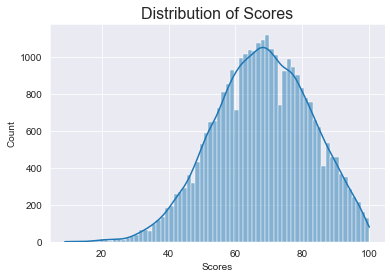

In [15]:
# Define figure size
plt.figure(figsize=(6, 4))

# Histogram of Scores
sns.histplot(data=students, 
             x="Scores", 
             kde=True)
# Give the plot a title
plt.title("Distribution of Scores",
         fontsize=16)

**Scores** variable has a normal distribution, slightly **skewed to the left**. It has a mean value of ~70, as shown by the plot above.

### Distribution of Grades

Text(0.5, 1.0, 'Grades')

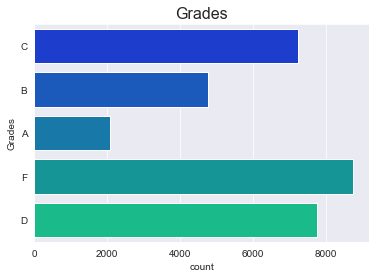

In [16]:
# Define figure size
plt.figure(figsize=(6, 4))

sns.countplot(data = students, 
              y ='Grades',
             palette="winter")        
# Plot title
plt.title('Grades', 
          fontsize=16)

The **greatest number** of students **got F grades**, followed by D and C. The **lowest count** of grades is for 
**students who got A's**.

### Scores by Test Preparation and Weekly Study Hours

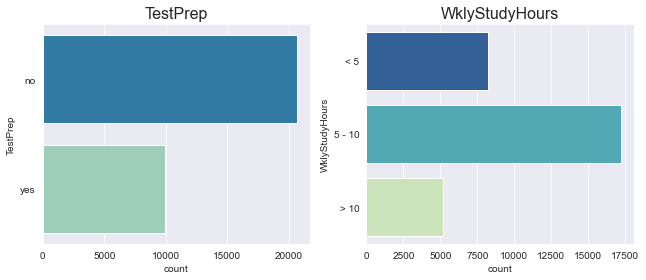

In [17]:
# Barplots for:
# Weekly Study Hours
# Test Preparation

# Create a figure and three subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Iterate over the columns and create the box plots
columns = ['TestPrep', 'WklyStudyHours']
for i, col in enumerate(columns):
    ax = axs[i]
    sns.countplot(y=students[col], 
                  ax=ax, palette="YlGnBu_r")
    ax.set_title(col, fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

**Most** of the **students** study between **5 and 10 hours per week**. Only a **small number** of students study **over 10 hours**
per week.

Also, **most** of the students **do not prepare for the tests**.

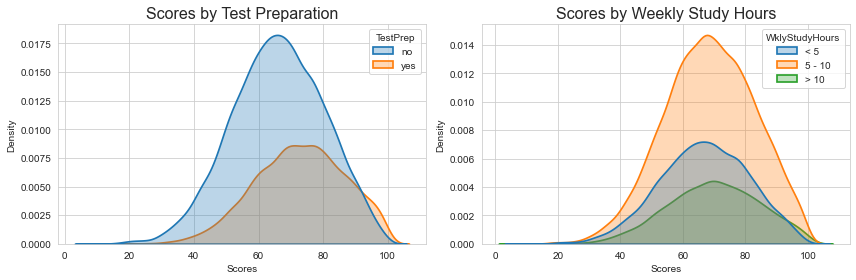

In [18]:
# KDE plots
# Scores by Test Preparation
# Scores by Weekly Study Hours

sns.set_style('whitegrid')

# Define figure size
plt.figure(figsize=(12,4))

# Create subplots
plt.subplot(121)
# Display kdeplot
sns.kdeplot(data=students,
            x="Scores", 
            hue="TestPrep", 
            fill=True, 
            alpha=0.3, 
            linewidth=1.7)
# Add title
plt.title('Scores by Test Preparation', 
          fontsize=16)

plt.subplot(122)
# Display kdeplot
sns.kdeplot(data=students, 
            x="Scores", 
            hue="WklyStudyHours", 
            fill=True, 
            alpha=0.3, 
            linewidth=1.7)
# Add title
plt.title('Scores by Weekly Study Hours', 
          fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

Students who **prepare for tests** perform **better** than those who do not.

**More study time** (more than 10 hours per week) leads to **higher** overall **grades**.

### Scores by Parent Education

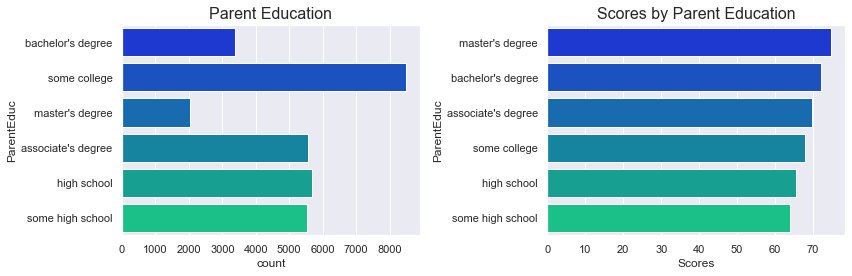

In [19]:
# Barplots
# Parent Education
# Scores grouped by Parent Education

sns.set_style('darkgrid')

# Group Scores by Parent Education
parent_score = students.groupby(
      'ParentEduc')['Scores'].\
       mean().sort_values(ascending=False)

# Define figure size
sns.set(rc={"figure.figsize":(12, 4)})

# Create subplots
plt.subplot(121)
# Display barplot
sns.countplot(data = students, 
              y ='ParentEduc',
             palette="winter")
# Plot title
plt.title('Parent Education', 
          fontsize=16)

plt.subplot(122)
# Display barplot
sns.barplot(x=parent_score, 
            y=parent_score.index,
           palette="winter")
# Plot title
plt.title('Scores by Parent Education', 
          fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

The **highest number** of **parents** have **some college** as education level and the **lowest number** have **master's degree**.

**Parental education** has an **impact** on the **child's educational status**. 

**Students with parents** that have **master's degree** education level have the **highest overall score**. 



### Scores by Gender

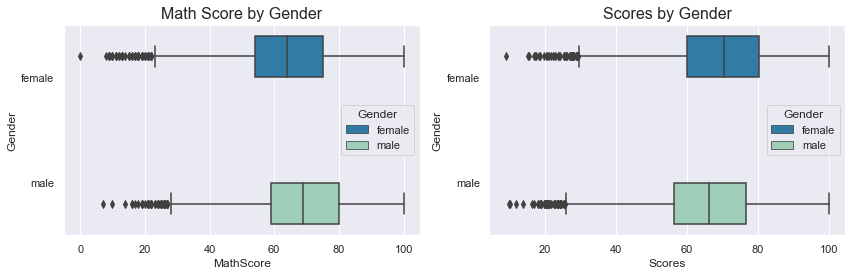

In [20]:
# Boxplots
# Math Score by Gender
# overall Scores by Gender


# Define figure size
plt.figure(figsize=(12,4))

# Create subplots
plt.subplot(121)
# Display barplot
sns.boxplot(y='Gender', 
            x='MathScore', 
            data=students, 
            hue='Gender',
            palette="YlGnBu_r")
# Add title
plt.title('Math Score by Gender', 
          fontsize=16)

plt.subplot(122)
# Display barplot
sns.boxplot(y='Gender', 
            x='Scores', 
            data=students, 
            hue='Gender',
            palette="YlGnBu_r")
# Add title
plt.title('Scores by Gender', 
          fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

We observe that **males perform better** than **females** in **Maths**.  **Overall score** is **higher** for **females** 
than **males**. 

In both cases this is evidenced by the **higher median** and **25th pecentile scores**.

### Scores by Ethnic Group and Practice Sport

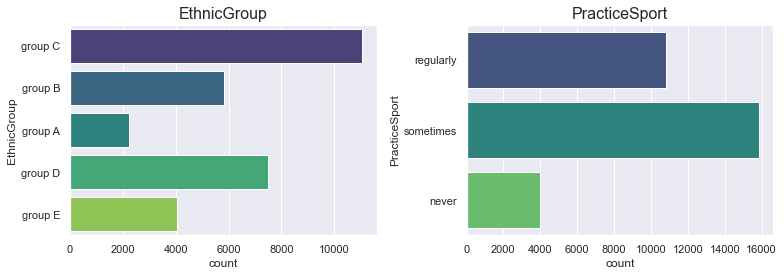

In [21]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# Iterate over the columns and create the box plots
columns = ['EthnicGroup', 'PracticeSport']
for i, col in enumerate(columns):
    ax = axs[i]
    sns.countplot(y=students[col], 
                  ax=ax, palette="viridis")
    ax.set_title(col, fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Most students practice sport only sometimes. Ethnic Group C has the highest number of students.

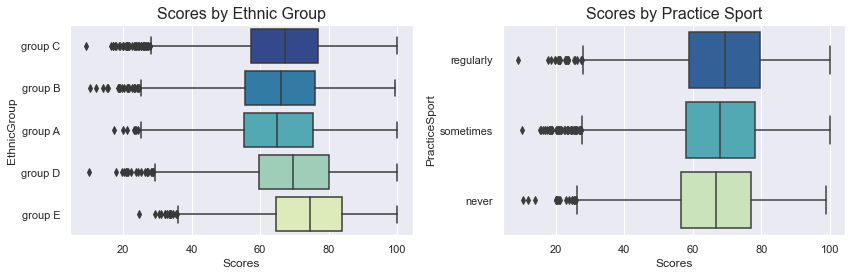

In [22]:
# Boxplots
# Scores by Ethnic Group
# Scores by Practice Sports


# Define figure size
plt.figure(figsize=(12,4))

# Create subplots
plt.subplot(121)
# Display barplot
sns.boxplot(y='EthnicGroup', 
            x='Scores', 
            data=students, 
            palette="YlGnBu_r")  
# Add title
plt.title('Scores by Ethnic Group', 
          fontsize=16)

plt.subplot(122)
# Display barplot
sns.boxplot(y='PracticeSport', 
            x='Scores', 
            data=students, 
            palette="YlGnBu_r")
# Add title
plt.title('Scores by Practice Sport', 
          fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

**Students** from **Ethnic Group E perform better** overall compared to their counterparts from other Ethnic groups recorded.

Also, **students** who **practice sport regularly** have **higher overall grades** than those who don't.

Other insights from the data are:
   
- The **number of siblings** of a student **does not affect** their grades
- It has **no importance** for the grades if the student is **the first child** or not